# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# opening the csv
employee = pd.read_csv(r'C:\Users\pao-l\Documents\GitHub\lab-pivot-table-and-correlation\your_code\data\Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# Method 1 (without pivot tables)
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# Method 2 (pivot tables)
employee.pivot_table(values = 'Salary', index= ['Department'], aggfunc = ['mean'])

,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
employee.pivot_table(index= ['Department', 'Title'], aggfunc = ['mean'])

mean      
                     Salary Years
Department Title                 
HR         VP          70.0   8.0
           analyst     32.5   3.0
IT         VP          70.0   8.0
           analyst     32.5   1.5
           associate   60.0   7.0
Sales      associate   55.0   2.5

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
employee.pivot_table(index= ['Department', 'Title'], aggfunc = ['mean'])

mean      
                     Salary Years
Department Title                 
HR         VP          70.0   8.0
           analyst     32.5   3.0
IT         VP          70.0   8.0
           analyst     32.5   1.5
           associate   60.0   7.0
Sales      associate   55.0   2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# your answer here
employee.pivot_table(values = ['Salary', 'Name'], index= ['Department', 'Title'], aggfunc = {'Salary':'mean', 'Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
employee.pivot_table(values = 'Salary', index= ['Department', 'Title'], aggfunc = ['median', 'min', 'max', 'std'])

#We can see that the rows that have NaN in the std have the min and max values equal to the median because there is only 1 employee in that department with that title


median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
#Filling the missing values with 0
employee.pivot_table(values = 'Salary', index= ['Department', 'Title'], fill_value=0, dropna = False, aggfunc = ['median', 'min', 'max', 'std'])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate    0.0      0      0  0.000000
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      VP           0.0      0      0  0.000000
           analyst      0.0      0      0  0.000000
           associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here
employee.pivot_table(values = ['Salary', 'Name'], index= ['Department'], aggfunc = {'Salary':'sum', 'Name':'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [11]:
employee.pivot_table(values = ['Salary', 'Years'], index= ['Department', 'Title'], aggfunc = {'Salary':'mean', 'Years': 'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [12]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [13]:
# your answer here

fitbit = pd.read_csv(r'C:\Users\pao-l\Documents\GitHub\lab-pivot-table-and-correlation\your_code\data\Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [14]:
#Checking data types
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.3+ KB


In [15]:
#Descriptive statistics of numerical variables
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [16]:
# Correlation matrix
fitbit.corr()

#From the matrix we can see that there is a positive and fairly strong correlation of 0.571 between Minutes Very Active and Steps

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10))

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'], c='c')
plt.ylabel('Steps')
plt.xlabel('Minutes Very Active')
plt.title('Minutes Very active vs Steps')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

#### What can you say about Minute Very Active and Steps? Write a comment below

In [18]:
# There is a positive linear correlation between the 2 variables, the higher the minutes very active the higher number of steps.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [19]:
# Computing correlation
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])


0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(*args, **kw)>

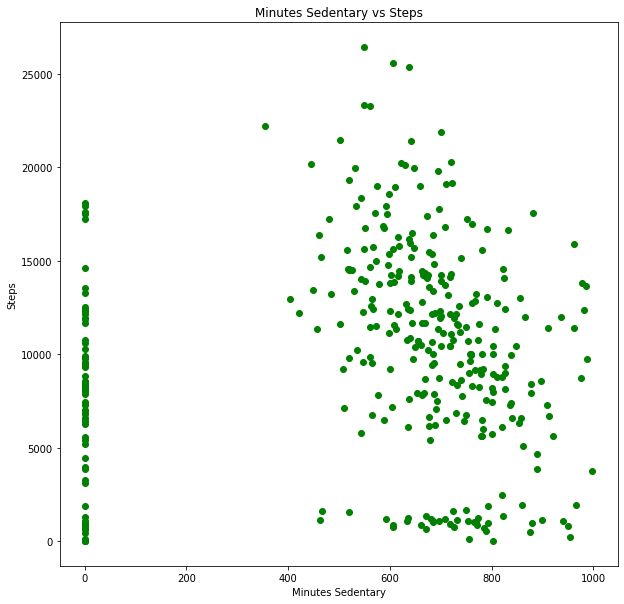

In [20]:
figure(num=None, figsize=(10, 10))

plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'], c='g')
plt.ylabel('Steps')
plt.xlabel('Minutes Sedentary')
plt.title('Minutes Sedentary vs Steps')
plt.show

#There seems to be a correlation however the linear correlation is not that strong. Maybe there is a monotonic correlation between the 2 variables.


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [21]:
# Computing correlation
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(*args, **kw)>

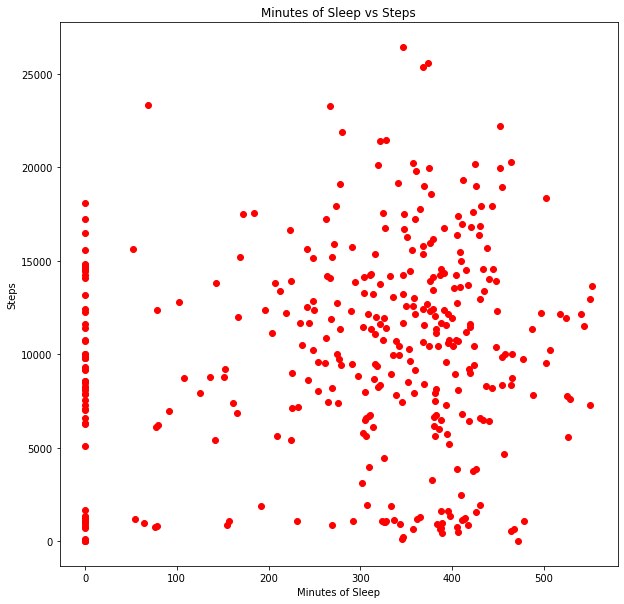

In [22]:
# your answer here
figure(num=None, figsize=(10, 10))

plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'], c='r')
plt.ylabel('Steps')
plt.xlabel('Minutes of Sleep')
plt.title('Minutes of Sleep vs Steps')
plt.show

#There is a positive not very strong linear correlation between the variables.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [23]:
# your answer here

subset = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit = subset.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [24]:
#Sorting by Steps
cor_fit.sort_values(by='Steps')

# The highly correlated features with the variable Steps are Floors and Minutes Very Active

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [25]:
# your answer here
time_grades = pd.read_csv(r'C:\Users\pao-l\Documents\GitHub\lab-pivot-table-and-correlation\your_code\data\Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

<function matplotlib.pyplot.show(*args, **kw)>

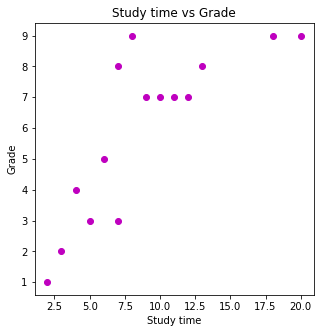

In [26]:
figure(num=None, figsize=(5, 5))

plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'], c='m')
plt.ylabel('Grade')
plt.xlabel('Study time')
plt.title('Study time vs Grade')
plt.show

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [27]:
# Calculating correlation methods
corr = time_grades.corr()
corr_2 = time_grades.corr(method = 'spearman')

In [28]:
#Pearson correlation
corr

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [29]:
#Spearman correlation
corr_2

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [30]:
#There is a positive strong correlation between Study time and Grade


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(*args, **kw)>

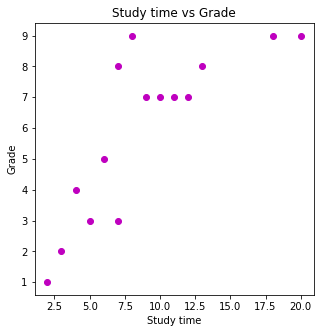

In [31]:
# Scatter plot
figure(num=None, figsize=(5, 5))

plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'], c='m')
plt.ylabel('Grade')
plt.xlabel('Study time')
plt.title('Study time vs Grade')
plt.show


#There is a strong positive correlation between study time and grades. The higher the number of hours a student spends studying the better his/her grades will be.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [32]:
#That the Spearman correlation is higher means the rank correlation is larger than the linear correlation.